In [113]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2

In [114]:
path1 = os.getcwd()
path2= 'sample_data'

In [115]:
path = os.path.join(path1, path2)


In [118]:
os.chdir(path)

FileNotFoundError: ignored

In [57]:
def read_img(path, grayscale=True):
  img = cv2.imread(path)
  if grayscale:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img, cmap='gray')
    return img
  
  try:
    cv2.imshow("display", img)
    return img

  except Exception as e:
    print(e)
    from google.colab.patches import cv2_imshow
    cv2_imshow(img)
    return img

In [58]:
path3= 'car1.jpeg'

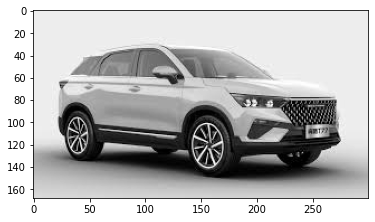

In [59]:
car = read_img(path=path3, grayscale=True)

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



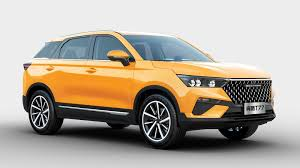

In [61]:
colored_car= read_img(path= path3,grayscale=False )

In [68]:
car.shape


(168, 300)

In [63]:
colored_car.shape

(168, 300, 3)

We have read the images now we will create conv layers

# Applying single conv layer

In [72]:
# reshapping the car image as per requirement
row, col = car.shape

batch = 1
ch= 1
reshaped_car_img= car.reshape(batch, row, col, ch)
reshaped_car_img.shape

(1, 168, 300, 1)

In [80]:
input_shape= reshaped_car_img.shape[1:]
CONV_LAYER= [
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), strides=(1,1), input_shape= input_shape)
]

conv_model= tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 166, 298, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


10 Total parameter = 3 * 3 * 1 + 1

In [81]:
out= conv_model.predict(reshaped_car_img)

In [83]:
out.shape

(1, 166, 298, 1)

In [84]:
_, row, col, _ = out.shape
output_img= out.reshape(row, col)

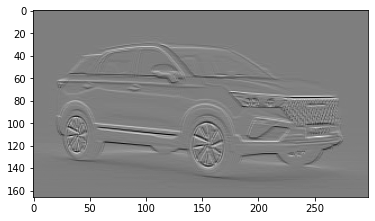

In [85]:
plt.imshow(output_img, cmap='gray')

Here we can see that horizontal ages are highlighted more if we will apply more filters it will filter the images randomly we will see it afterwards

How we will apply the filter for Colored car image

In [87]:
colored_car.shape

(168, 300, 3)

In [88]:
row, col, ch = colored_car.shape
batch = 1
reshaped_colored_car= colored_car.reshape(batch, row, col, ch)

In [92]:
input_shape= reshaped_colored_car.shape[1:]

CONV_LAYER= [
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), strides=(1,1), input_shape= input_shape)
]

conv_model= tf.keras.Sequential(CONV_LAYER)
conv_model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


Totla Param = 3 * 3 * 3 + 1 = 28 (as per the kernel size)

In [93]:
colored_out= conv_model.predict(reshaped_colored_car)

In [94]:
colored_out.shape

(1, 166, 298, 1)

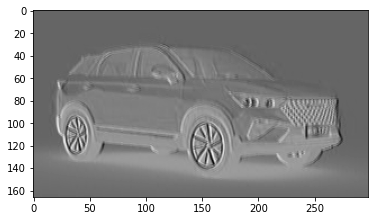

In [95]:
_, row, col, _ = colored_out.shape
colored_out= colored_out.reshape(row, col)
plt.imshow(colored_out, cmap= 'gray')

Here we can focus that wheels has been highlighed more.

Now lets check the ouputs by applying more filters.
first we will chek this for gray image followed by colored images

In [98]:

input_shape= reshaped_car_img.shape[1:]

CONV_LAYER= [
    tf.keras.layers.Conv2D(filters=5, kernel_size=(3,3), strides=(1,1), input_shape=input_shape)
]

conv_model= tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 166, 298, 5)       50        
                                                                 
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


In [106]:
gray_out= conv_model.predict(reshaped_car_img)

In [107]:
gray_out.shape

(1, 166, 298, 5)

In [109]:
def apply_conv_model_and_visualize(img, conv_model):
  try:
    out = conv_model.predict(img)
    print(out.shape)
    _, row, col, channels = out.shape
    reshape_out = out.reshape(row, col, channels)
    for channel in range(channels):
      plt.imshow(reshape_out[:,:,channel], cmap="gray")
      plt.show()
  except Exception as e:
    raise e

(1, 166, 298, 5)


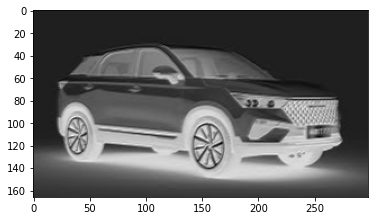

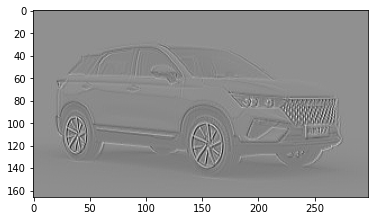

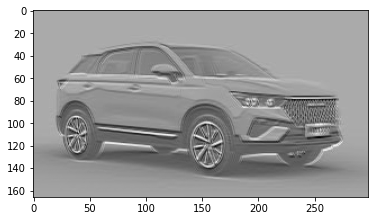

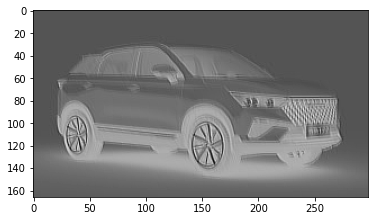

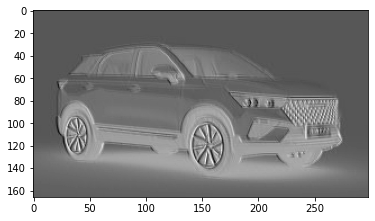

In [110]:
apply_conv_model_and_visualize(reshaped_car_img, conv_model)

In [111]:
input_shape= reshaped_colored_car.shape[1:]

CONV_LAYER= [
    tf.keras.layers.Conv2D(filters=5, kernel_size=(3,3), strides=(1,1), input_shape= input_shape)
]

conv_model= tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 166, 298, 5)       140       
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________


(1, 166, 298, 5)


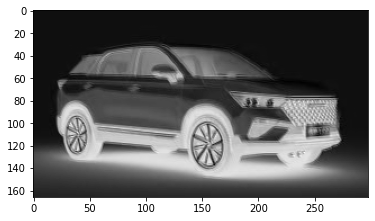

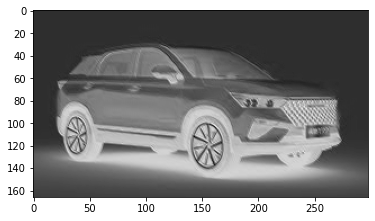

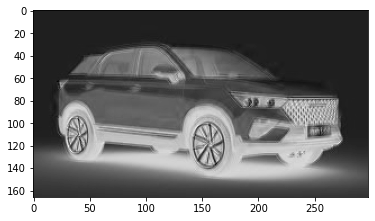

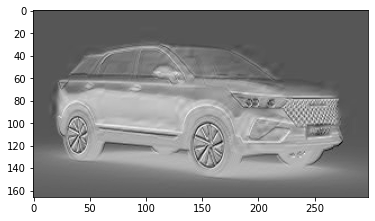

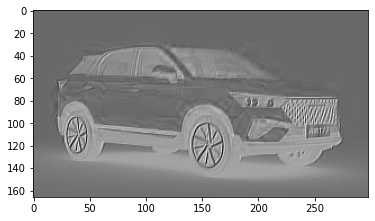

In [112]:
apply_conv_model_and_visualize(reshaped_colored_car, conv_model)